In [17]:
#Importing the necessary libraries to carry out our analysis
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

# Style and size of graph

sb.set_style('darkgrid')
sb.set(rc={'figure.figsize':(9,7)})

In [18]:
df = pd.read_csv('prosperLoanData.csv')
df = df[df['ProsperScore'].notnull()]

# Dataset overview


The dataset we are analyzing is the prosper loan one. Based on the existing data, we have decided to draw conclusions helping us to answer questions such as: 
- What can make one get a good loan amount?
- What can make one get his loan application approved?

Our conclusions will be made from over 84,000 observations in our dataset, which is substential and help us to be confident about what we will be saying.

## Univariate analysis

We will be seeing a few dimensions against the numbers of borrowers. This will help us to portray a typical profile of what a borrower is at Prosper.

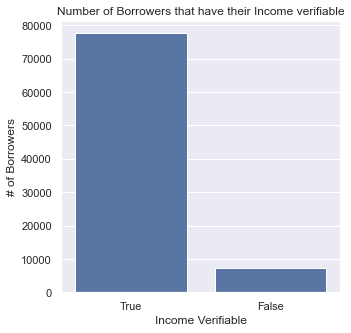

In [19]:
plt.figure(figsize=[5, 5])
base_color = sb.color_palette()[0]

# Order the categorical variable type
cat_order = df['IncomeVerifiable'].value_counts().index

sb.countplot(data = df, x = 'IncomeVerifiable', color = base_color, order=cat_order)
plt.xlabel('Income Verifiable')
plt.ylabel('# of Borrowers')
plt.title('Number of Borrowers that have their Income verifiable');

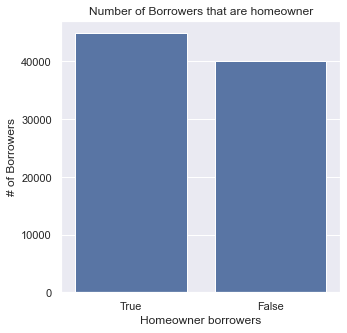

In [20]:
plt.figure(figsize=[5, 5])
base_color = sb.color_palette()[0]

# Order the categorical variable type
cat_order = df['IsBorrowerHomeowner'].value_counts().index

sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = base_color, order=cat_order)
plt.xlabel('Homeowner borrowers')
plt.ylabel('# of Borrowers')
plt.title('Number of Borrowers that are homeowner');

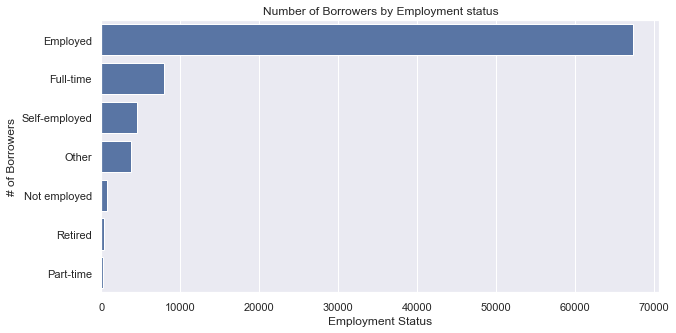

In [21]:
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]
# Order the categorical variable type
cat_order = df['EmploymentStatus'].value_counts().index

sb.countplot(data = df, y = 'EmploymentStatus', color = base_color, order=cat_order)
plt.xlabel('Employment Status')
plt.ylabel('# of Borrowers')
plt.title('Number of Borrowers by Employment status');

As seen, most of the borrowers are employed and have their income verifiable. In addition, it seems like having asset such as  an home is a valuable element for Prosper.

## Bivariate analysis

We now know at least three elements that most borrowers at Prosper share. When Prosper lends money to someone, they assign a score to this person, which is more or less an assessment of the risk they are committing.

- Has the score a big influence on loans lent?
- Does the score translate well into Debt to Income ratio for borrowers?
- Does a good score helps to get a lower APR?

To not lose ourselves in too much granularity, I have prepared 4 groups of Prosper Score: Bad (0-3), Average (3-5), Good (5-8), Very good (8-11). Even if this is the bivariate section of our analysis, let's quickly look at the distribution of the data regarding this new categorical dimension:

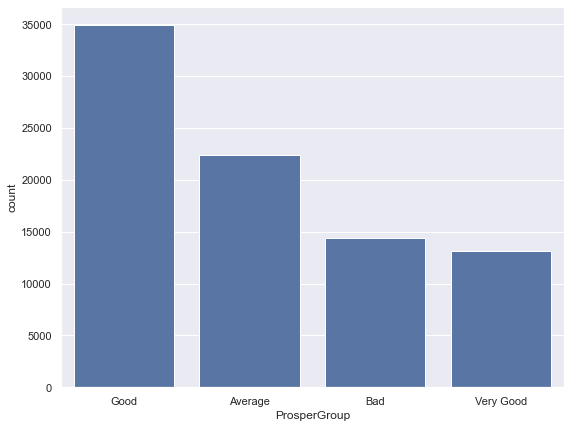

In [22]:
bin_edges= [0, 3, 5, 8, 11]
bin_edges

bin_names = ['Bad', 'Average', 'Good', 'Very Good']
bin_names

df['ProsperGroup']=pd.cut(df['ProsperScore'], bin_edges, labels=bin_names)

cat_order = df['ProsperGroup'].value_counts().index

sb.countplot(data = df, x = 'ProsperGroup', color = base_color, order=cat_order)

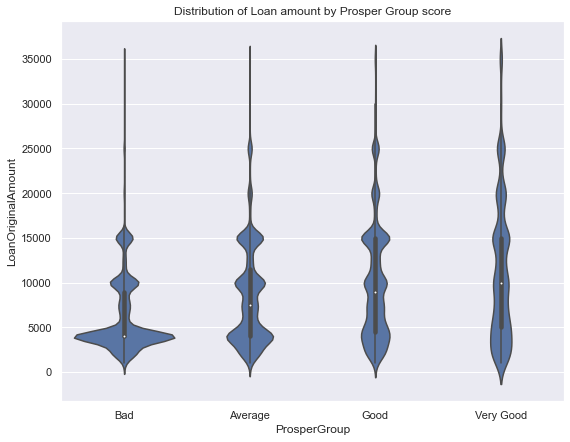

In [23]:
base_color = sb.color_palette()[0]
bins = np.arange(0, 35000, 1500)
sb.violinplot(data = df, x = 'ProsperGroup' , y = 'LoanOriginalAmount', bins=bins, color = base_color)
plt.title('Distribution of Loan amount by Prosper Group score')
plt.show()

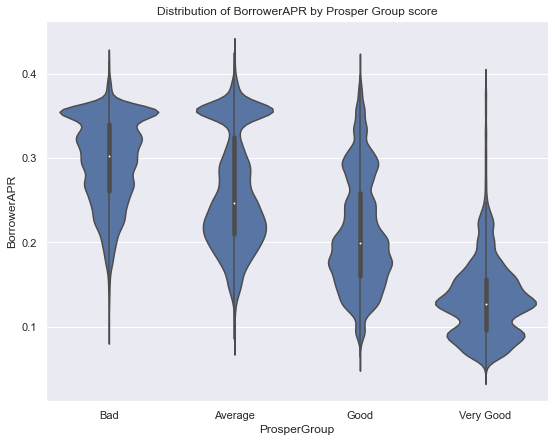

In [24]:
base_color = sb.color_palette()[0]
bins = np.arange(0, 35000, 1500)
sb.violinplot(data = df, x = 'ProsperGroup' , y = 'BorrowerAPR' ,bins=bins, color = base_color)
plt.title('Distribution of BorrowerAPR by Prosper Group score')
plt.show()

Distribution of Debt to Income ratio by Prosper Group score:


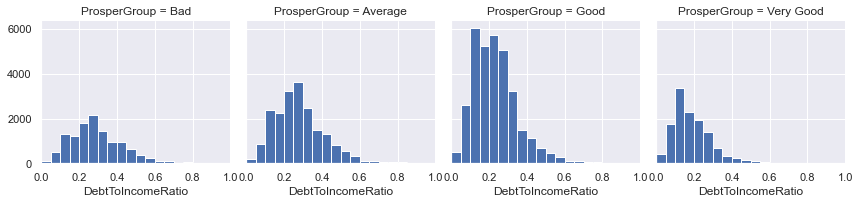

In [25]:
print('Distribution of Debt to Income ratio by Prosper Group score:')
bins = np.arange(0, 1, 0.05)
g = sb.FacetGrid(data = df, col = 'ProsperGroup', margin_titles = True)
g.map(plt.hist,'DebtToIncomeRatio', bins=bins)
plt.xlim(0,1)
plt.show()

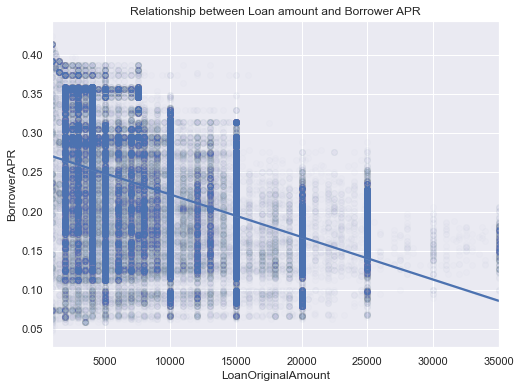

In [26]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01})
plt.title('Relationship between Loan amount and Borrower APR');

In [27]:
df['IncomeRange'] = df['IncomeRange'].apply(lambda x: x[1:] if x[0] == '$' else x)
df['IncomeRange'] = df['IncomeRange'].apply(lambda x: x.replace(',','').replace('+','').replace('$',''))

di = {'Not employed':'0-0', 'Not displayed':'0-0', '0':'0-0', '100000':'100000-150000'}
df = df.replace({'IncomeRange': di})

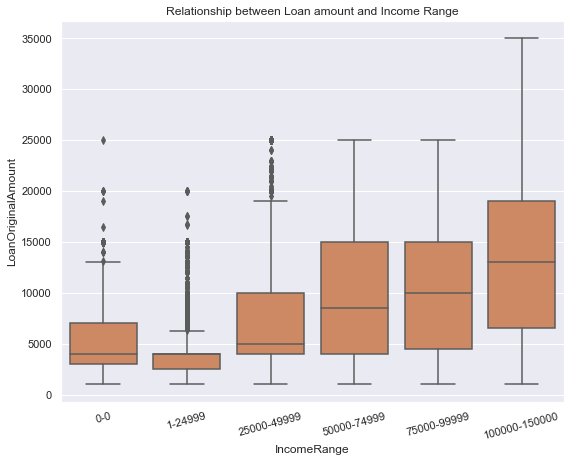

In [28]:
income_classes = ['0-0','1-24999' ,'25000-49999', '50000-74999', '75000-99999', '100000-150000']
incomeclasses = pd.api.types.CategoricalDtype(ordered = True, categories= income_classes)
df['IncomeRange'] = df['IncomeRange'].astype(incomeclasses)

base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount',color = base_color)
plt.title('Relationship between Loan amount and Income Range')
plt.xticks(rotation = 15)
plt.show()

As seen, there is no question that a good score helps to get a higher loan amount as well as a loan with a lower APR. As a consequence of the these two elements, higher loans amount tend to have lower APR. A good prosper score is essential! The Good group of the prosper score group is the one that entails most of the borrowers.

## Multivariate analysis

Despite the Prosper score, we might have other elements helping us to have more "colors" in our analysis.

In the distribution of BorrowerAPR among Prosper group score, is there any difference between those who have theur income verified and those who do not?

In the distribution of the Loan amount among Income Ranges, is there any difference between those who are homeowner and those who do not?

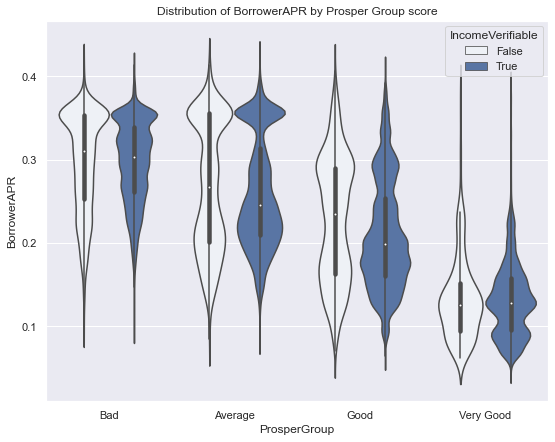

In [29]:
base_color = sb.color_palette()[0]
bins = np.arange(0, 35000, 1500)
sb.violinplot(data = df, x = 'ProsperGroup' , y = 'BorrowerAPR', hue = 'IncomeVerifiable' ,bins=bins, color = base_color)
plt.title('Distribution of BorrowerAPR by Prosper Group score')
plt.show()

It is clearly visible that being a home owner is a help to get a higher loan amount. Despite the income range being
similar:


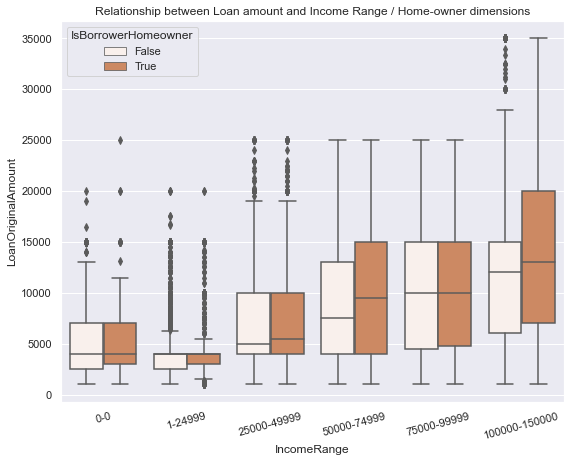

In [30]:
print('It is clearly visible that being a home owner is a help to get a higher loan amount. Despite the income range being')
print('similar:')

base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount',hue = 'IsBorrowerHomeowner' ,color = base_color)
plt.title('Relationship between Loan amount and Income Range / Home-owner dimensions')
plt.xticks(rotation = 15);

As seen, having your income verifiable helps you to have a lower APR. Evenly, to be a homeowner is helpful in order to get a higher loan amount, which is not surprising since higher incomes are more likely to have a property, and a better prosper score.

As an advice to future Prosper loans applicants, make sure you have your income verified even if you are not among the lucky ones to have a property!